In [1]:
import pandas as pd
from google.colab import drive

from sklearn.preprocessing import OneHotEncoder
#from sklearn.linear_model import LogisticRegression
#from sklearn import tree
import numpy as np

!pip install --upgrade category_encoders
import category_encoders  as ce
from matplotlib import pyplot as plt

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [3]:
data_frame

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Para aquellas filas con mucho porcentaje de nans ***(a mi criterio, las que tienen+60%)*** , voy a fillearlas con 'unknown', mientras que aquellas que tengan porcentaje bajo, voy a usar el **'most-frequent strategy'** de simpleImputer

In [4]:
(( len(data_frame) - data_frame.count() )*100 / len(data_frame)).nlargest(len(data_frame.columns))

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

# Separando la variable a predecir

In [5]:
X = data_frame.drop('class', axis=1)
y = data_frame['class']

In [6]:
y = y.map({"e":1,"p":0})

# Division de sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

guardo el indice ya que despues de usar el SimpleImputer se me pierde ( lo necesito para mean encoding de category_encoders ) 

In [8]:
X_train_saved_index =  X_train.index
X_validation_saved_index = X_validation.index
X_test_saved_index = X_test.index

# Imputacion 

`Imputacion 1) Reemplazar por una constante`

In [9]:
X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')

`Imputacion 2) Reemplazar por el mas frecuente`

In [10]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')

In [11]:
X_train = pd.DataFrame(simple.fit_transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(simple.transform(X_validation), columns = X_validation.columns)
X_test = pd.DataFrame(simple.transform(X_test), columns = X_test.columns)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48855 entries, 0 to 48854
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cap-diameter          48855 non-null  object
 1   cap-shape             48855 non-null  object
 2   cap-surface           48855 non-null  object
 3   cap-color             48855 non-null  object
 4   does-bruise-or-bleed  48855 non-null  object
 5   gill-attachment       48855 non-null  object
 6   gill-spacing          48855 non-null  object
 7   gill-color            48855 non-null  object
 8   stem-height           48855 non-null  object
 9   stem-width            48855 non-null  object
 10  stem-root             48855 non-null  object
 11  stem-surface          48855 non-null  object
 12  stem-color            48855 non-null  object
 13  veil-type             48855 non-null  object
 14  veil-color            48855 non-null  object
 15  has-ring              48855 non-null

acá vuelvo a pasar las medidas a float porque se me pasaron a objeto

In [13]:
X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)

reemplazo el indice por el original

In [14]:
X_train.index = X_train_saved_index
X_validation.index = X_validation_saved_index 
X_test.index = X_test_saved_index

# Encodings 

Mean Encoding

In [15]:
meanEncod = ce.TargetEncoder(cols = ['cap-surface'	, 'gill-attachment'	])

In [16]:
X_train = meanEncod.fit_transform(X_train, y_train)
X_validation = meanEncod.transform(X_validation)
X_test =  meanEncod.transform(X_test)

OHE Encoding

In [17]:
ohe_ring = OneHotEncoder()

encoded_ring_train = ohe_ring.fit_transform(X_train[['has-ring']]).todense().astype(int)
encoded_ring_validation = ohe_ring.transform(X_validation[['has-ring']]).todense().astype(int)
encoded_ring_test = ohe_ring.transform(X_test[['has-ring']]).todense().astype(int)

encoded_bruise_train = ohe_ring.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_validation = ohe_ring.transform(X_validation[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_test = ohe_ring.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int)

In [18]:
X_train['has-ring'] = encoded_ring_train
X_validation['has-ring'] = encoded_ring_validation
X_test['has-ring'] = encoded_ring_test

X_train['does-bruise-or-bleed'] = encoded_bruise_train
X_validation['does-bruise-or-bleed'] = encoded_bruise_validation
X_test['does-bruise-or-bleed'] = encoded_bruise_test

Binary Encoding

In [19]:
bin_encoded = ce.BinaryEncoder(cols=["cap-shape","cap-color","gill-spacing","gill-color","stem-root","stem-surface",
                                     "stem-color","veil-type","veil-color","ring-type","spore-print-color","habitat" ,"season"], return_df = True,)

X_train = bin_encoded.fit_transform(X_train)
X_validation = bin_encoded.transform(X_validation)
X_test = bin_encoded.transform(X_test)

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

## Busqueda de hiper-parametros

In [21]:
rf_model = RandomForestClassifier(random_state=13)

from sklearn.model_selection import RandomizedSearchCV
params = [
{
          "n_estimators": np.arange(10, 120, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
]
rs_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, random_state=13, scoring='roc_auc')

## Entrenamos y predecimos

In [22]:
rs_rf.fit(X_train, y_train)
preds_rs_rf = rs_rf.predict(X_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

## Mejores hiper-parametros

In [23]:
rs_rf.best_params_

{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

## Mejor modelo

In [24]:
model_rs_rf= rs_rf.best_estimator_

In [25]:
model_rs_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=10000,
                       min_samples_split=14, n_estimators=90, random_state=13)

Matriz de confusion

In [26]:
cm = confusion_matrix(y_validation, preds_rs_rf)
cm

array([[3374,    0],
       [   1, 2732]])

## Score para validation

In [27]:
auc_result_rs_rf = roc_auc_score(y_validation, model_rs_rf.predict_proba(X_validation)[:,1])
print("AUC_ROC: %f" % (auc_result_rs_rf))

AUC_ROC: 1.000000


# Guardado del modelo con Pickle

In [28]:
import pickle
pickle.dump(model_rs_rf, open('/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/modelos/randomForest.pkl', 'wb'))

# Plot ROC Curve

In [29]:
!pip install scikit-plot

import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


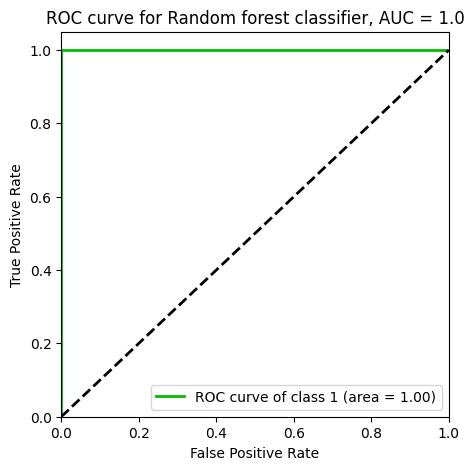

In [30]:
skplt.metrics.plot_roc(y_validation, model_rs_rf.predict_proba(X_validation), classes_to_plot= 1,plot_micro= False, plot_macro = False, figsize = (5,5), 
                       title='ROC curve for Random forest classifier, AUC = {}'.format(auc_result_rs_rf))

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                     'xtick.color':'black',
                     'ytick.color':'black',})
plt.show()

In [31]:
#plt.rcParams.update(plt.rcParamsDefault)

# Parte de puntos Extra

## Feature importance Random forest 


In [32]:
rf_features_list_rs = model_rs_rf.feature_names_in_
rf_features_imporance_list_rs = model_rs_rf.feature_importances_

In [33]:
rf_dicc_rs = {}
for i in range ( 0 , len(rf_features_list_rs) ):
  features_binary_clean = rf_features_list_rs[i].split('_')[0]
  if features_binary_clean not in rf_dicc_rs:
    rf_dicc_rs[features_binary_clean] = rf_features_imporance_list_rs[i]
  else:
    rf_dicc_rs[features_binary_clean] += rf_features_imporance_list_rs[i]

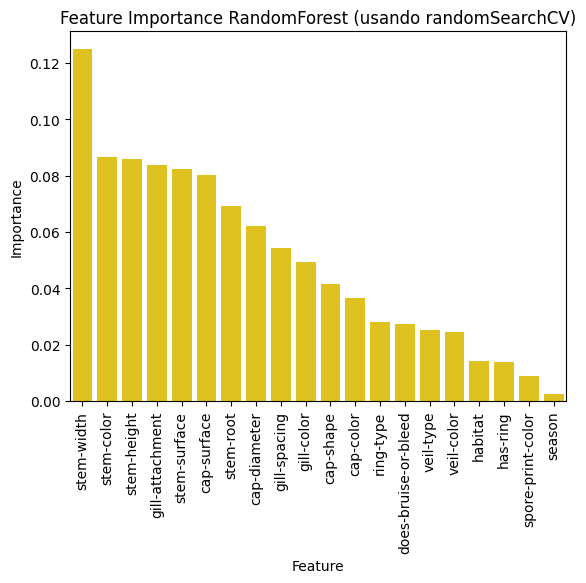

In [34]:
feature_importance_df = pd.DataFrame(rf_dicc_rs.items())
feature_importance_df.columns = ['Feature' , 'Importance']
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
import seaborn as sns
sns_plot = sns.barplot(x='Feature', y='Importance', data=feature_importance_df, color = 'Gold')
sns_plot.set(xlabel = 'Feature', ylabel='Importance', title='Feature Importance RandomForest (usando randomSearchCV)')
plt.xticks(rotation=90)

images_dir = '/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2'
plt.savefig(f"{images_dir}/random_forestFI.png",bbox_inches='tight')
plt.show()

## Comparasion Feature Importance Logistic regression VS Random forest

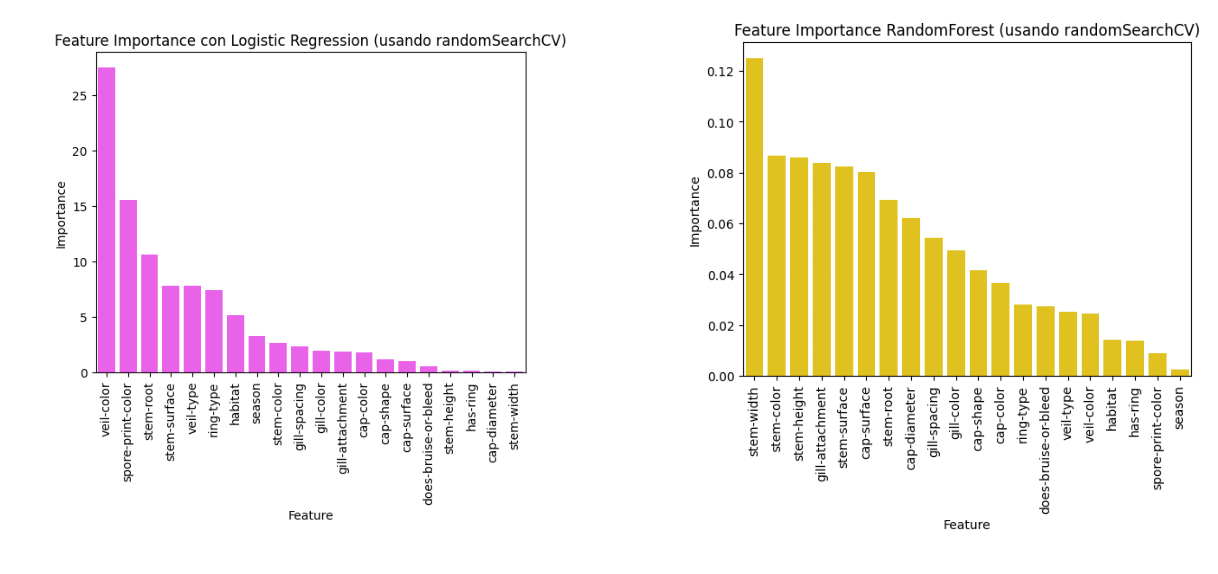

In [35]:
import matplotlib.image as mpimg
from matplotlib import rcParams

img_A = mpimg.imread('/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/Logistic_regressionFI.png')
img_B = mpimg.imread('/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/random_forestFI.png')
# display images
rcParams['figure.figsize'] = 15 ,15
plt.rcParams.update({'xtick.color':'white',          
                      'ytick.color':'white',
                      'axes.edgecolor':'white',
                     })

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)